# LINEAR REGRESSION

In [331]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc = {'figure.figsize':(8,8)})

In [332]:
data = [
    (7,12),
    (20,35),
    (49,78),
    (17,53),
    (20,95),
    (45,99),
    (14,78),
    (34,56)
]

In [333]:
x = [pt[0] for pt in data]
y = [pt[1] for pt in data]

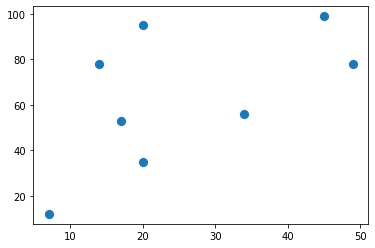

In [334]:
sns.scatterplot(x=x, y=y, s=100)

In [335]:
n = len(x)
xx = [a * a for a in x]
xy = [x[i] * y[i] for i in range(n)]

In [336]:
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xx = np.sum(xx)
sum_xy = np.sum(xy)

In [337]:
m = (n * sum_xy - sum_x * sum_y) / (n* sum_xx - sum_x * sum_x)
b = (sum_y - m * sum_x) / n

In [338]:
print(f'Line equation : y = {round(m,2)} * x + {round(b,2)}')

Line equation : y = 1.13 * x + 34.03


In [339]:
def plotgraph(x, y, slope, intercept):
    axes = sns.scatterplot(x=x, y=y, s=100)
    x_val = np.array(axes.get_xlim())
    y_val = slope * x_val + intercept
    plt.plot(x_val, y_val, '-', color='red')

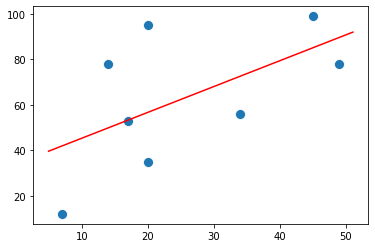

In [340]:
plotgraph(x, y, m, b)

# K MEANS

In [341]:
import pandas as pd
import numpy as np
import seaborn as sns

In [342]:
class Kmeans:
    def __init__(self, k):
        self.k = k     
    
    def __distance(self, x, y):
        return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2
    
    def fit(self, points, centroids):
        prev_clusters = None
        clusters = [set() for _ in range(self.k)]
        
        while prev_clusters != clusters:
            prev_clusters = clusters
            for p in points:
                idx = 0
                for i in range(1, self.k):
                    if self.__distance(p, centroids[i]) < self.__distance(p, centroids[idx]):
                        idx = i
                clusters[idx].add(p)
            for i in range(self.k):
                centroids[i] = np.mean(list(clusters[i]), axis = 0)
        return clusters, centroids

In [343]:
points = [
          (0.1, 0.6),
          (0.15, 0.71),
          (0.08,0.9),
          (0.16, 0.85),
          (0.2,0.3),
          (0.25,0.5),
          (0.24,0.1),
          (0.3,0.2)
]

Before Clustering

In [344]:
raw_df = pd.DataFrame()
x = [p[0] for p in points]
y = [p[1] for p in points]
raw_df['x'] = x
raw_df['y'] = y
raw_df

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


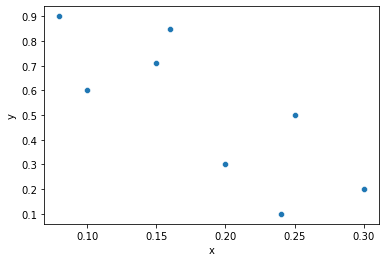

In [345]:
sns.scatterplot(data = raw_df, x = 'x', y = 'y')

After Clustering

In [346]:
model = Kmeans(2)

In [347]:
clusters, centroids = model.fit(points, centroids = [(0.1, 0.6),(0.3,0.2)])

In [348]:
clustered_df = pd.DataFrame()
x=[]
y=[]
category=[]
for i in range(len(clusters)):
    for p in clusters[i]:
        x.append(p[0])
        y.append(p[1])
        category.append(f'{i}')
for c in centroids:
    x.append(c[0])
    y.append(c[1])
    category.append('Centroid')
clustered_df['x'] = x
clustered_df['y'] = y
clustered_df['Category'] = category
clustered_df

,x,y,Category
0,0.150000,0.710,0
1,0.250000,0.500,0
2,0.100000,0.600,0
3,0.160000,0.850,0
4,0.080000,0.900,0
5,0.240000,0.100,1
6,0.200000,0.300,1
7,0.300000,0.200,1
8,0.148000,0.712,Centroid
9,0.246667,0.200,Centroid


In [349]:
print(f'number of points in cluster 1 is : {len(clusters[1])}')

number of points in cluster 1 is : 3


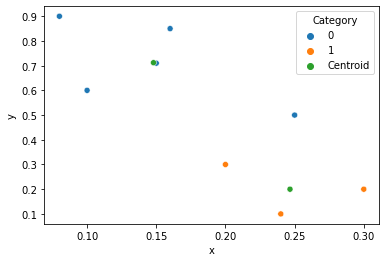

In [350]:
sns.scatterplot(data = clustered_df, x = 'x', y = 'y', hue = 'Category')

# SDES

In [351]:
P10 = [3, 5, 2, 7, 4, 10, 1, 9, 8, 6]
P8 = [6, 3, 7, 4, 8, 5, 10, 9]

In [352]:
def apply_permutation(x, p):
    res = []
    for i in p:
        res.append(x[i-1])
    return res

In [353]:
def left_shift(x, places = 1):
    places %= len(x)
    return x[places:] + x[:places]

In [354]:
key = [1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
# key = [1,0,1,0,0,0,1,0,1,1]

In [355]:
key_p10 = apply_permutation(key, P10)
print(f'key after P10 : {key_p10}')

key after P10 : [0, 0, 1, 1, 0, 0, 1, 1, 1, 1]


In [356]:
l = key_p10[:5]
r = key_p10[5:]
l_s1 = left_shift(l, 1)
r_s1 = left_shift(r, 1)
print(f'after left shift, left : {l_s1} and right : {r_s1}')

after left shift, left : [0, 1, 1, 0, 0] and right : [1, 1, 1, 1, 0]


In [357]:
key_ls_1 = l_s1 + r_s1
k1 = apply_permutation(key_ls_1, P8)
print(f'key 1 : {k1}')

key 1 : [1, 1, 1, 0, 1, 0, 0, 1]


In [358]:
l_s2 = left_shift(l_s1, 2)
r_s2 = left_shift(r_s1, 2)
print(f'after left shift, left : {l_s2} and right : {r_s2}')

after left shift, left : [1, 0, 0, 0, 1] and right : [1, 1, 0, 1, 1]


In [359]:
key_ls_2 = l_s2 + r_s2
k2 = apply_permutation(key_ls_2, P8)
print(f'key 2 : {k2}')

key 2 : [1, 0, 1, 0, 0, 1, 1, 1]


In [360]:
print(f'key 1 : {k1}')
print(f'key 2 : {k2}')

key 1 : [1, 1, 1, 0, 1, 0, 0, 1]
key 2 : [1, 0, 1, 0, 0, 1, 1, 1]


Encryption

In [361]:
plain_text = [0, 0, 1, 0, 1, 0, 0, 0]
# plain_text = [1,0,1,0,0,1,0,1]

In [362]:
initial_permutation = [2, 6, 3, 1, 4, 8, 5, 7]
expansion_permutation = [4, 1, 2, 3, 2, 3, 4, 1]
P4 = [2, 4, 3, 1]
inv_initial_permutation = [4, 1, 3, 5, 7, 2, 8, 6]

In [363]:
def xor_func(x, y):
    res = []
    for i in range(len(x)):
        res.append(x[i] ^ y[i])
    return res

In [364]:
def two_halves(x):
    n = len(x) // 2;
    return x[:n], x[n:]

In [365]:
S0 = [[1,0,3,2],
      [3,2,1,0],
      [0,2,1,3],
      [3,1,3,2]]

S1=  [[0,1,2,3],
      [2,0,1,3],
      [3,0,1,0],
      [2,1,0,3]]

def sbox_func(p, s):
    row = int(f'{p[0]}{p[3]}',2)
    col = int(f'{p[1]}{p[2]}',2)
    val = s[row][col]
    
    if val == 0: return [0, 0]
    elif val == 1: return [0, 1]
    elif val == 2: return [1, 0]
    else: return val[1, 1]

In [366]:
def algo_rounds(plain, key, swap):
    l, r = two_halves(plain)
    r_new = apply_permutation(r, expansion_permutation)
    r_new = xor_func(r_new, key)
    r_new_l, r_new_r = two_halves(r_new)
    r_new = sbox_func(r_new_l, S0) + sbox_func(r_new_r, S1)
    r_new = apply_permutation(r_new, P4)
    r_new = xor_func(l, r_new)
    return r + r_new if swap else r_new + r

In [367]:
plain_ip = apply_permutation(plain_text, initial_permutation)
print(f' after initial permutation {plain_ip}')

 after initial permutation [0, 0, 1, 0, 0, 0, 1, 0]


In [368]:
plain_ip = algo_rounds(plain_ip, k1, True)
print(plain_ip)

[0, 0, 1, 0, 0, 0, 1, 1]


In [369]:
plain_ip = algo_rounds(plain_ip, k2, False)
print(plain_ip)

[0, 0, 0, 1, 0, 0, 1, 1]


In [370]:
cipher_text = apply_permutation(plain_ip, inv_initial_permutation)
print(cipher_text)

[1, 0, 0, 0, 1, 0, 1, 0]


Decryption

In [371]:
cipher_ip = apply_permutation(cipher_text, initial_permutation)
print(cipher_ip)

[0, 0, 0, 1, 0, 0, 1, 1]


In [372]:
cipher_ip = algo_rounds(cipher_ip, k2, True)
print(cipher_ip)

[0, 0, 1, 1, 0, 0, 1, 0]


In [373]:
cipher_ip = algo_rounds(cipher_ip, k1, False)
print(cipher_ip)

[0, 0, 1, 0, 0, 0, 1, 0]


In [374]:
decrypted_text = apply_permutation(cipher_ip, inv_initial_permutation)
print(decrypted_text)

[0, 0, 1, 0, 1, 0, 0, 0]


# RSA

In [375]:
import numpy as np
import math
from sympy import isprime

In [376]:
class RSA:
    def __init__(self):
        self.p = 53 #self.__random_prime_no()
        self.q = 59 #self.__random_prime_no()
        self.n = self.p * self.q
        self.phi = (self.p - 1) * (self.q - 1)
        self.e = self.__generate_e()
        self.d = self.__generate_d()

#do only if necessary!
#     def __random_prime_no(self):
#         prime_no = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
#         return np.random.choice(prime_no)
    
#     def __alternative_prime_func(self):
#         res = []
#         for i in range(100):
#             if isprime(i): res.append(i)
#         return np.random.choice(res)
    
    def __generate_e(self):
        for i in range(2, self.phi):
            if math.gcd(i, self.phi) == 1:
                return i
        return None
    
    def __generate_d(self):
        for k in range(1, self.phi):
            if (k * self.phi + 1) % self.e == 0:
                return int((k * self.phi + 1) / self.e)
        return None
    
    def getPublicKeys(self):
        return self.n , self.e
    
    def encrypt(self, plaintext):
        return (plaintext ** self.e) % self.n
    
    def decrypt(self, ciphertext):
        return (ciphertext ** self.d) % self.n
        
            
        

In [377]:
process = RSA()

In [378]:
print(f'public keys : {process.getPublicKeys()}')

public keys : (3127, 3)


In [379]:
plaintext = 89
ciphertext = process.encrypt(plaintext)
print(ciphertext)

1394


In [380]:
wapas_plain = process.decrypt(ciphertext)
print(wapas_plain)

89


# ECC

In [391]:
class ECC:
    def __init__(self, a, b ,q, G, private_key):
        self.a = a
        self.b = b
        self.q = q
        self.G = G
        self.private_key = private_key
        self.public_key = self.__generate_public_key()
    
    def __round(self, p):
        x, y = p
        if abs(x - int(x)) < 0.0001: x = int(x)
        if abs(y - int(y)) < 0.0001: y = int(y)
        return (x, y)
    
    def negate(self, p):
        return(p[0], -p[1])
    
    def add(self, p, q):
        if p == q:
            lamda = ((3 * (p[0] ** 2)) + a) / (2 * p[1])
            x = (lamda ** 2) - (2 * p[0])
            y = -p[1] + (lamda * (p[0] - x))
        else:
            lamda = (q[1] - p[1]) / (q[0] - p[0])
            x = (lamda ** 2) - p[0] - q[0]
            y = -p[1] + (lamda * (p[0] - x))
        return self.__round((x, y))
    
    def sub(self, p, q):
        return self.add(p, self.negate(q))
    
    def dot(self, k , p):
        res = (p[0], p[1])
        for _ in range(k - 1):
            res = self.add(res, p)
            res = self.negate(res)
        return res
    
    def __generate_public_key(self):
        return self.dot(self.private_key, self.G)
    
    def get_public_key(self):
        return self.public_key
    
    def generate_secret_key(self, var_public_key):
        return self.dot(self.private_key, var_public_key)
    
    def encrypt(self, message, var_public_key):
        k = 3
        return (self.dot(k, self.G), self.add(message, self.dot(k, var_public_key))) 
    
    def decrypt(self, message):
        return self.sub(message[1], self.dot(self.private_key, message[0]))

In [392]:
a = 1
b = 6
q = 11
G = (5, 2)

In [394]:
ecc_user1 = ECC(a, b, q, G, 5)

In [396]:
ecc_user2 = ECC(a, b, q, G, 8)

In [ ]:
message = (2, 7)

In [399]:
cipher = ecc_user1.encrypt(message, ecc_user2.get_public_key())
print(f'message : {message}, ciphertext : {cipher}')

message : (2, 7), ciphertext : ((5, 2), (1.2808433428296553, 6.536217996997118))


In [400]:
decrypt_val = ecc_user2.decrypt(cipher)
print(decrypt_msg)

(2, 7)


# KNN

In [410]:
import numpy as np

In [416]:
class KNN:
    def __init__(self, k):
        self.k = k
        self.X = []
        self.y = []
    
    def fit(self, X, y):
        self.X = self.X + X
        self.y = self.y + y
        
    def __distance(self, x, y):
        return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2
    
    def __get_class(self, X):
        distances = []
        for i in range(len(X)):
            distances.append((self.__distance(X, self.X[i]), y[i]))
        distances.sort()
        distances = distances[:self.k]
        counts = {}
        for d in distances:
            try : counts[d[1]] += 1
            except: counts[d[1]] = 1
        return max(counts, key = lambda i: counts[i])
    
    def predict(self, X):
        preds = []
        for x in X:
            preds.append(self.__get_class(x))
        return preds
    
    def __get_weighted_class(self, X):
        distances = []
        for i in range(len(X)):
            distances.append((self.__distance(X, self.X[i]), y[i]))
        distances.sort()
        distances = distances[:self.k]
        counts = {}
        for d in distances:
            try : counts[d[1]] += 1 / d[0]
            except: counts[d[1]] = 1 / d[0]
        return max(counts, key = lambda i: counts[i])
    
    def predict_weighted(self, X):
        preds = []
        for x in X:
            preds.append(self.__get_weighted_class(x))
        return preds
    
    def __get_locally_weighted_average_class(self, X):
        distances = []
        for i in range(len(X)):
            distances.append((self.__distance(X, self.X[i]), y[i]))
        distances.sort()
        distances = distances[:self.k]
        counts = {}
        for d in distances:
            try : counts[d[1]].append(1 / d[0])
            except: counts[d[1]] = [1 / d[0]]
        for c in counts:
            counts[c] = np.mean(counts[c])
        return max(counts, key = lambda i: counts[i])
    
    def predict_locally_weighted_average_(self, X):
        preds = []
        for x in X:
            preds.append(self.__get_locally_weighted_average_class(x))
        return preds

In [417]:
X = [
     (2, 4),
     (4, 6),
     (4, 4),
     (4, 2),
     (6, 4),
     (6 ,2)
]
y = ['Y', 'Y', 'B', 'Y', 'Y', 'B']

In [418]:
model = KNN(3)

In [419]:
model.fit(X, y)

In [420]:
print(f'Standard KNN : {model.predict([(6,6)])}')

Standard KNN : ['Y']


In [421]:
print(f'Distance Weighted KNN : {model.predict_weighted([(6,6)])}')

Distance Weighted KNN : ['Y']


In [422]:
print(f'locally Weighted average KNN : {model.predict_locally_weighted_average_([(6,6)])}')

locally Weighted average KNN : ['Y']


# Diffie Hellman

In [1]:
#public keys
P = 17
G = 31

In [2]:
#private keys
a = 13
b = 9

In [3]:
#generate keys
x = (G ** a) % P
y = (G ** b) % P
print(f' keys generated are : {x}, {y}')

 keys generated are : 11, 7


In [5]:
#Secret keys
key_a = (y ** a) % P
key_b = (x ** b) % P
print(f'secret keys generated are : {key_a}, {key_b}')

secret keys generated are : 6, 6


# Decision Tree

In [6]:
import numpy as np
import pandas as pd

In [7]:
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']
data = [['<21', 'High', 'Male', 'Single', 'No'],
        ['<21', 'High', 'Male', 'Married', 'No'],
        ['21-35', 'High', 'Male', 'Single', 'Yes'],
        ['>35', 'Medium', 'Male', 'Single', 'Yes'],
        ['>35', 'Low', 'Female', 'Single', 'Yes'],
        ['>35', 'Low', 'Female', 'Married', 'No'],
        ['21-35', 'Low', 'Female', 'Married', 'Yes'],
        ['<21', 'Medium', 'Male', 'Single', 'No'],
        ['<21', 'Low', 'Female', 'Married', 'Yes'],
        ['>35', 'Medium', 'Female', 'Single', 'Yes'],
        ['<21', 'Medium', 'Female', 'Married', 'Yes'],
        ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
        ['21-35', 'High', 'Female', 'Single', 'Yes'],
        ['>35', 'Medium', 'Male', 'Married', 'No']
        ]
df = pd.DataFrame(columns=columns, data=data)

In [8]:
df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [10]:
class Node:
    def __init__(self, attr: str, defi: bool, out: None):
        self.attr = attr
        self.defi = defi
        self.out = out
    
    def getOutput(self, input):
        if self.defi:
            return self.out
        return self.out[input[self.attr]].getOutput(input)
    
    def __str__(self):
        return f' defi : {self.defi} , output : {self.out}'

In [23]:
class DecisionTree:
    def __init__(self, df, target: str):
        self.df = df
        self.target = target
        
    def __GiniIndex(self, df, colName):
        tot = len(df[self.target])
        unique_output = df[self.target].unique()
        uniqueVals = df[colName].value_counts()
        giniArr = {}
        for i in uniqueVals.keys():
            giniInd = 1
            for j in unique_output:
                t = df[df[colName] == i]
                t = t[t[self.target] == j]
                t = len(t[self.target])
                giniInd -= (t / uniqueVals[i])**2
                giniArr[i] = giniInd
        gini_final = 0
        for i in giniArr:
            gini_final += (uniqueVals[i] / tot) * giniArr[i]
        return gini_final
    
    def __getAllGini(self, df):
            giniDict = {}
            for i in df.columns:
                if i !=self.target:
                    giniDict[i] = self.__GiniIndex(df, i)
            return giniDict
            
    def buildTree(self, df):
        giniDict = self.__getAllGini(df)
        col = min(giniDict, key = giniDict.get)
        uniqueVals = df[col].unique()
        istargetunique = len(df[self.target].unique()) == 1
        if istargetunique:
            defi = True
            out = df[self.target].unique()[0]
            return Node(col, defi, out)
        elif len(df.columns) == 2:
            defi = True
            out = df[self.target].value_counts().idxmax()
            return Node(col, defi, out)
        else:
            defi = False
            outMap = {}
            for i in uniqueVals:
                sub_df = df[df[col] == i]
                sub_df = sub_df.drop(columns=[col], axis = 1)
                outMap[i] = self.buildTree(sub_df)
            return Node(col, defi, outMap)
        

In [24]:
dt = DecisionTree(df, 'Buys')
root = dt.buildTree(df)

In [25]:
print(str(root))

 defi : False , output : {'<21': <__main__.Node object at 0x0000014693924AF0>, '21-35': <__main__.Node object at 0x0000014693924B50>, '>35': <__main__.Node object at 0x00000146939240D0>}


In [26]:
root.getOutput({'Age':'<21', 'Income':'Low','Gender':'Female','Marital Status':'Married'})

'Yes'